In [ ]:
!pip install transformers datasets evaluate accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install arabert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 12.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186456 sha256=719eccf48131caa146ef7c06267d0a09aa20b290f1cdaaeadd3c17680ef1c128
  Stored in directory: /root/.cache/pip/wheels/bb/f1/26/f9002669ef6ad80a3c9f1b22880b35d9b4c6650011acee0523
Successfully built emoji


In [ ]:
# connecting to huggingface
from huggingface_hub import notebook_login

notebook_login()

# Load Data

In [ ]:
import json

with open(r"/content/output.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [ ]:
data

[{'text': 'كل اللي ربي يكتبه خير', 'label': 1},
 {'text': 'اللي ربي كاتبه خير حيسير', 'label': 1},
 {'text': 'ربي اللي عالم وين الخير عسى ان تقرهو شيئا وهو خير لكم', 'label': 1},
 {'text': 'وعسى ان تحبوه شيئا وهو شر لكم الله يعلم وانتم لا تعلمو',
  'label': 1},
 {'text': 'رب العالمين ما هيكتب لي لكل شيء كويس', 'label': 1},
 {'text': 'انا واثقة بالله أولا واخيرا', 'label': 1},
 {'text': 'انا ممكن الاقي أحسن منه', 'label': 1},
 {'text': 'ورب حيعودني باللي أفضل منه', 'label': 1},
 {'text': 'هو أصلا لي ما يستاهل', 'label': 1},
 {'text': 'ايش الفرق', 'label': 0},
 {'text': 'هين حصل ايه', 'label': 0},
 {'text': 'نوع من ايه', 'label': 0},
 {'text': 'إني أنا أهل أكبر', 'label': 1},
 {'text': 'انا اللي علا', 'label': 1},
 {'text': 'انا اللي أفضل بعد الله', 'label': 1},
 {'text': 'وأمري كلو خير', 'label': 1},
 {'text': 'أنا أمري مع الله كلو خير', 'label': 1},
 {'text': 'أنا كلو خير', 'label': 1},
 {'text': 'أنا حلاق اللي يخلق عشر غيره', 'label': 1},
 {'text': 'وألف غيره', 'label': 1},
 {'text': 

In [ ]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from arabert.preprocess import ArabertPreprocessor
import evaluate
import numpy as np
from transformers import DataCollatorWithPadding

In [ ]:
# uploading dataset using Dataset
dataset_dict = Dataset.from_list(data)

In [ ]:
dataset_dict

Dataset({
    features: ['text', 'label'],
    num_rows: 604
})

# Train-Test split

In [ ]:
# First split: train (80%) and temp (20%)
splits = dataset_dict.train_test_split(test_size=0.2, seed=42)

train_dataset = splits["train"]
temp_dataset = splits["test"]

# Second split: validation (10%) and test (10%) from the 20%
val_test_splits = temp_dataset.train_test_split(test_size=0.5, seed=42)

val_dataset = val_test_splits["train"]
test_dataset = val_test_splits["test"]

In [ ]:
# push to HF
from datasets import DatasetDict

dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
})

dataset.push_to_hub("EslamWalid/eou-arabic-dataset")


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

                              : 100%|##########| 14.1kB / 14.1kB            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

                              : 100%|##########| 3.28kB / 3.28kB            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

                              : 100%|##########| 2.96kB / 2.96kB            

CommitInfo(commit_url='https://huggingface.co/datasets/EslamWalid/eou-arabic-dataset/commit/9b0dda5a850200748af868898ccb17345aec0990', commit_message='Upload dataset', commit_description='', oid='9b0dda5a850200748af868898ccb17345aec0990', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/EslamWalid/eou-arabic-dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='EslamWalid/eou-arabic-dataset'), pr_revision=None, pr_num=None)

# Load model from HF

In [ ]:
# Load model directly
model_path = "aubmindlab/bert-base-arabertv02"

tokenizer = AutoTokenizer.from_pretrained(model_path)

id2label = {0: "not_EOU", 1: "EOU"}
label2id = {"not_EOU": 0, "EOU": 1}
model = AutoModelForSequenceClassification.from_pretrained(model_path,
                                                           num_labels=2,
                                                           id2label=id2label,
                                                           label2id=label2id,)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# freeze base model parameters
for name, param in model.base_model.named_parameters():
    param.requires_grad = False

# unfreeze base model pooling layers
for name, param in model.base_model.named_parameters():
    if "pooler" in name:
        param.requires_grad = True

# Text preprocessing

In [ ]:
# define text preprocessing
arabert_prep = ArabertPreprocessor(model_path)

def preprocess_function(examples):
    texts = [arabert_prep.preprocess(t) for t in examples["text"]]
    return tokenizer(texts, truncation=True, max_length=64)


In [ ]:
# tokenize all datasetse
tokenized_train_dataset = train_dataset.map(preprocess_function, batched=True)
tokenized_test_dataset = test_dataset.map(preprocess_function, batched=True)
tokenized_val_dataset = val_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/483 [00:00<?, ? examples/s]

Map:   0%|          | 0/61 [00:00<?, ? examples/s]

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

In [ ]:
# create data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Evaluation

In [ ]:
# load metrics
accuracy = evaluate.load("accuracy")
auc_score = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    # get predictions
    predictions, labels = eval_pred

    # apply softmax to get probabilities
    probabilities = np.exp(predictions) / np.exp(predictions).sum(-1, keepdims=True)
    # use probabilities of the positive class for ROC AUC
    positive_class_probs = probabilities[:, 1]
    # compute auc
    auc = np.round(auc_score.compute(prediction_scores=positive_class_probs, references=labels)['roc_auc'],3)

    # predict most probable class
    predicted_classes = np.argmax(predictions, axis=1)
    # compute accuracy
    acc = np.round(accuracy.compute(predictions=predicted_classes, references=labels)['accuracy'],3)

    return {"Accuracy": acc, "AUC": auc}

# Train

In [ ]:
# hyperparameters
lr = 2e-5
batch_size = 32
num_epochs = 30

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/bert-classifier",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    logging_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

In [ ]:
from transformers import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)],
)

trainer.train()

/tmp/ipython-input-3328062552.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Auc
1,0.481400,0.610151,0.623000,0.720000
2,0.478400,0.612532,0.623000,0.716000
3,0.459200,0.615034,0.623000,0.712000
4,0.440400,0.612943,0.590000,0.719000
5,0.455200,0.611222,0.590000,0.722000
6,0.456300,0.609808,0.607000,0.720000
7,0.418500,0.608862,0.607000,0.720000
8,0.473400,0.608406,0.623000,0.719000
9,0.456700,0.608166,0.623000,0.719000
10,0.457300,0.607711,0.623000,0.722000


TrainOutput(global_step=480, training_loss=0.45037471055984496, metrics={'train_runtime': 461.9183, 'train_samples_per_second': 31.369, 'train_steps_per_second': 1.039, 'total_flos': 132986707932300.0, 'train_loss': 0.45037471055984496, 'epoch': 30.0})

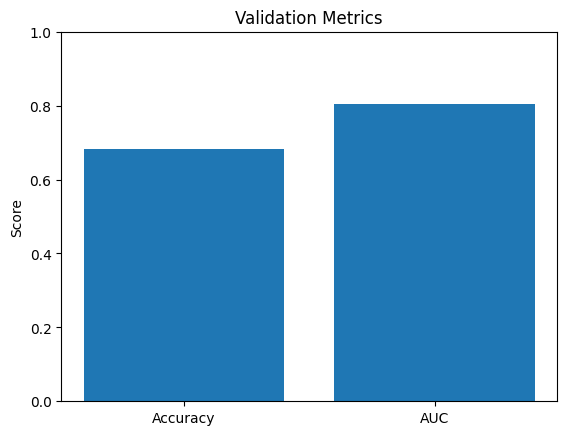

In [ ]:
import matplotlib.pyplot as plt
names = list(metrics.keys())
values = list(metrics.values())

plt.figure()
plt.bar(names, values)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Validation Metrics")
plt.show()

In [ ]:
# apply model to validation dataset
predictions = trainer.predict(tokenized_val_dataset)

# Extract the logits and labels from the predictions object
logits = predictions.predictions
labels = predictions.label_ids

# Use your compute_metrics function
metrics = compute_metrics((logits, labels))
print(metrics)

{'Accuracy': np.float64(0.683), 'AUC': np.float64(0.805)}


In [ ]:
trainer.push_to_hub()

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...82245.77dd1d0cca75.1563.0: 100%|##########| 22.7kB / 22.7kB            

  ...ssifier/model.safetensors:   6%|6         | 33.5MB /  541MB            

  ...625785.210aff8b54b5.173.0:  23%|##3       | 7.97kB / 34.5kB            

  ...626968.210aff8b54b5.173.1:  23%|##3       | 1.33kB / 5.77kB            

  ...626993.210aff8b54b5.173.2:  23%|##3       | 5.30kB / 22.9kB            

  ...ssifier/training_args.bin:  23%|##3       | 1.36kB / 5.91kB            

CommitInfo(commit_url='https://huggingface.co/EslamWalid/bert-classifier/commit/89e6c963af8443b5e7753d313e24063c54651449', commit_message='End of training', commit_description='', oid='89e6c963af8443b5e7753d313e24063c54651449', pr_url=None, repo_url=RepoUrl('https://huggingface.co/EslamWalid/bert-classifier', endpoint='https://huggingface.co', repo_type='model', repo_id='EslamWalid/bert-classifier'), pr_revision=None, pr_num=None)

In [ ]:
from transformers import pipeline
text = "والله"
classifier = pipeline(model="EslamWalid/bert-classifier")


Device set to use cuda:0


[{'label': 'EOU', 'score': 0.7002367973327637}]

In [ ]:
text = "ولكن"
text = arabert_prep.preprocess(text)
classifier(text)

[{'label': 'not_EOU', 'score': 0.7726535201072693}]

In [ ]:
def predict_eou(text):
    text = arabert_prep.preprocess(text)
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=64)
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=-1)
    return probs
